<h3>Auto company</h3> <hr>
<h2>Project Summary</h2>
<hr>
<h3>Requirements</h3><br>

An Auto company is doing the survey and trying to do the benchmarking of price of the New models / Variants. they would be launching in future based upon the various parameters of Vehicle.<br>

•   Supervised predictive model need to be created which can predict the price of the Vehicle based upon the various attributes of the Vehicle.<br>
•	Build the Multivariate Linear regression model, verifying the assumptions of the linear regression hold true.<br>
•	Models should be evaluated based on the various metrics (Rsquare, Adjusted R Square).<br>
•	Model accuracy should be high but at the same time model should not be overfitted.<br>
•	Plots need to be constructed to check the assumptions of the Regression.<br>
•	Feature Selection needs to done, which will tell the impact of feature is increasing the price and which feature has the diminishing impact on the price. Features with their respective importance score needs to be tabulated<br>


<h3>Analysis</h3><br>
The data is ordinal, nominal as well as categorical. To analyze the data, various data processing techniques like Label Encoding. For training the data and predicting the target, algorithms used Linear Regression.

Steps we performned:<br>
1) Data cleansing <br>
2) One hot encoding <br>
3) Lable Encoding <br>
3) Drop unwanted columns <br>
4) Split data into training test sets and <br>
5) Build the model <br>





<h3>Summary</h3><br>
The project is done with the purpose of:
Build the Multivariate Linear regression model

The following steps are carried out:

Importing the data, necessary libraries, & exploring the data to look for missing values.
Selecting the features for analysis, label encoding the ordinal column and splitting the data into test & train.
Training the data using Linear Regression algorithms and checking the MSE, RMSE and MAPE to find out model accuracy.



<h3>Results</h3><br>
We have observed that Performance of the model is 85.08 %



<hr>
<hr>
<h3>Python Code</h3><br>



#### Import Library 

In [122]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Create dataframe df and load car price data

In [123]:
df =  pd.read_csv(r"car_price.csv")
df.head(3)

,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### Data Cleansing

In [124]:
df.replace('?', np.nan, inplace = True)
df.price.fillna(df.price.median(),inplace=True)
df["price"] = df["price"].astype("int")

In [125]:
df.isnull().sum()

symboling             0
normalized_losses    41
Fuel_Type             0
Aspiration            0
No_of_Doors           2
Body_Style            0
Drive_Wheels          0
Engine_Location       0
Wheel_Base            0
Manufacturer          0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [126]:
#df.describe(include ='all')

In [127]:
### Fill Null with most occurence/median
df.normalized_losses.fillna('161',inplace=True) #
df.No_of_Doors.fillna('four',inplace=True)
df.bore.fillna('3.62',inplace=True)
df.stroke.fillna('3.4',inplace=True)
df.horsepower.fillna('68',inplace=True)
df.peak_rpm.fillna('5500',inplace=True)

In [128]:
df.Drive_Wheels.unique()
df.Drive_Wheels.replace('4wd','fwd',inplace=True)

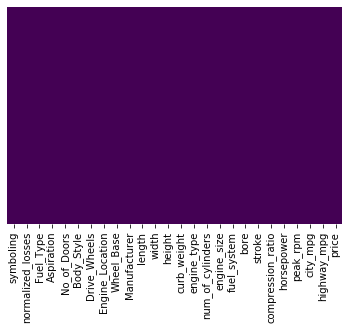

In [129]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Note: Finally we do not have nulls in data frame

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   Fuel_Type          205 non-null    object 
 3   Aspiration         205 non-null    object 
 4   No_of_Doors        205 non-null    object 
 5   Body_Style         205 non-null    object 
 6   Drive_Wheels       205 non-null    object 
 7   Engine_Location    205 non-null    object 
 8   Wheel_Base         205 non-null    float64
 9   Manufacturer       205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [131]:
#Change Data type
df["normalized_losses"] = df["normalized_losses"].astype("int")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("int")
df["peak_rpm"] = df["peak_rpm"].astype("int")


In [132]:
df.head(2)

,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,161,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### On hot encoding

In [133]:
#df['Fuel_Type'].unique()
df['Aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [134]:
Fuel_Type = df[["Fuel_Type"]]
c = pd.get_dummies(Fuel_Type)

Body_Style = df[["Body_Style"]]
c = pd.get_dummies(Body_Style)


# Concatenate dataframe
df = pd.concat([df,Fuel_Type,Body_Style], axis = 1 )

df.drop(['Fuel_Type','Body_Style'], axis = 1, inplace = True)

#### Label Encoding

In [135]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [136]:
df[df.select_dtypes(include=['object']).columns]=df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [137]:
df.head(2)

,symboling,normalized_losses,Aspiration,No_of_Doors,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,161,0,1,1,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,0,1,1,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500


### drop unwanted columns

In [138]:
df=df.drop(['normalized_losses','symboling'], axis=1)



In [139]:
df.columns

Index(['Aspiration', 'No_of_Doors', 'Drive_Wheels', 'Engine_Location',
       'Wheel_Base', 'Manufacturer', 'length', 'width', 'height',
       'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
       'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [140]:
df.head(2)

,Aspiration,No_of_Doors,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,1,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,0,1,1,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500


### Linear Model Building

In [141]:
cp_x=df.drop(['price'], axis=1)
cp_y=df.price

In [142]:
from sklearn.model_selection import train_test_split
cp_train_x  , cp_test_x , cp_train_y, cp_test_y = train_test_split(cp_x , cp_y , test_size = .2 , random_state = 101)

In [143]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [144]:
reg.fit(cp_train_x, cp_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### RSquare Error on train Data

In [145]:
Rsquare=reg.score(cp_train_x,cp_train_y)
Rsquare

0.8709037204296527

### AdjRsquare Error on train Data

In [146]:
K=cp_train_x.shape[-1]
N=len(cp_train_x)
AdjRsquare =  1 -  (1-Rsquare) * (N - 1) /  ( N- K - 1)
AdjRsquare

0.8518120171129112

### Prediction on test data

In [147]:
pred_test=reg.predict(cp_test_x)
error=cp_test_y-pred_test

MSE=np.mean(error*error)
RMSE=np.power(MSE,.5)
MAPE=np.mean(np.absolute(error/cp_test_y))*100

In [148]:
MSE

5002541.63071985

### Results

In [149]:
print('-------------------------------')
print('Linear Regression Model Results')
print('-------------------------------')
print('Data Set: car_price.csv')
print()
print('R^2:          {:.2}'.format(Rsquare))
print('Adjusted R^2: {:.2}'.format(AdjRsquare))
print()
print('MSE:          {:.2f}'.format(MSE))
print('RMSE:         {:.2f}'.format(RMSE))
print('MAPE:         {:.2f}'.format(MAPE))
print()
print('Performance:  {0:.2f} %'.format(100-MAPE))



-------------------------------
Linear Regression Model Results
-------------------------------
Data Set: car_price.csv

R^2:          0.87
Adjusted R^2: 0.85

MSE:          5002541.63
RMSE:         2236.64
MAPE:         14.92

Performance:  85.08 %


In [150]:
!ipython nbconvert CAR_PRICE.ipynb
import os
os.rename(r'CAR_PRICE.html',r'index.html')

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook CAR_PRICE.ipynb to html
[NbConvertApp] Writing 342948 bytes to CAR_PRICE.html
